<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data(y_hat)_add_delta_(2_8)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_2.8'

In [4]:
os.listdir(base_path)

['data_add_delta_2.8_n20.csv',
 'data_add_delta_2.8_n30.csv',
 'data_add_delta_2.8_n60.csv',
 'data_add_delta_2.8_n120.csv',
 'data_add_delta_2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.8_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,99.310182,36.673443,99.661162,80.141580,265.649847,591.436213,617.085622,-25.649409
1,0.0,1.0,93.464743,49.314954,62.267993,35.613421,225.652675,476.313785,266.178761,210.135024
2,0.0,2.0,82.626574,81.416933,70.280345,64.845462,-194.433437,114.735876,257.654085,-142.918208
3,0.0,3.0,32.575001,86.054245,33.767558,46.468820,-172.457858,36.407765,-152.686343,189.094108
4,0.0,4.0,38.442152,40.092782,99.836525,27.450886,150.141907,365.964252,247.201066,118.763186
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,56.073783,92.979431,47.169511,33.238915,-199.651090,39.810549,177.521608,-137.711058
119996,999.0,116.0,89.195142,59.192875,90.919048,77.441280,422.660958,749.409303,223.962302,525.447001
119997,999.0,117.0,79.702994,35.300770,75.280521,87.397046,234.211365,521.892697,236.753576,285.139121
119998,999.0,118.0,65.962105,77.568561,96.182533,90.988130,-277.352654,63.348676,200.821836,-137.473160


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,99.310182,36.673443,99.661162,80.141580,265.649847,591.436213,617.085622,-25.649409
1,0.0,1.0,93.464743,49.314954,62.267993,35.613421,225.652675,476.313785,266.178761,210.135024
2,0.0,2.0,82.626574,81.416933,70.280345,64.845462,-194.433437,114.735876,257.654085,-142.918208
3,0.0,3.0,32.575001,86.054245,33.767558,46.468820,-172.457858,36.407765,-152.686343,189.094108
4,0.0,4.0,38.442152,40.092782,99.836525,27.450886,150.141907,365.964252,247.201066,118.763186
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,56.073783,92.979431,47.169511,33.238915,-199.651090,39.810549,177.521608,-137.711058
119996,999.0,116.0,89.195142,59.192875,90.919048,77.441280,422.660958,749.409303,223.962302,525.447001
119997,999.0,117.0,79.702994,35.300770,75.280521,87.397046,234.211365,521.892697,236.753576,285.139121
119998,999.0,118.0,65.962105,77.568561,96.182533,90.988130,-277.352654,63.348676,200.821836,-137.473160


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    99.310182  36.673443  99.661162  80.141580   265.649847   
      1.0    93.464743  49.314954  62.267993  35.613421   225.652675   
      2.0    82.626574  81.416933  70.280345  64.845462  -194.433437   
      3.0    32.575001  86.054245  33.767558  46.468820  -172.457858   
      4.0    38.442152  40.092782  99.836525  27.450886   150.141907   
...                ...        ...        ...        ...          ...   
999.0 115.0  56.073783  92.979431  47.169511  33.238915  -199.651090   
      116.0  89.195142  59.192875  90.919048  77.441280   422.660958   
      117.0  79.702994  35.300770  75.280521  87.397046   234.211365   
      118.0  65.962105  77.568561  96.182533  90.988130  -277.352654   
      119.0  26.910025  92.627642  45.304544  49.473436 -1277.683853   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0     591.436213  617.085622   -25.649409  
      1.0     476.313785  266.178761   210.135024  
      2.0     114.735876  257.654085  -142.918208  
      3.0      36.407765 -152.686343   189.094108  
      4.0     365.964252  247.201066   118.763186  
...                  ...         ...          ...  
999.0 115.0    39.810549  177.521608  -137.711058  
      116.0   749.409303  223.962302   525.447001  
      117.0   521.892697  236.753576   285.139121  
      118.0    63.348676  200.821836  -137.473160  
      119.0 -1053.368207  168.396735 -1221.764942  

[120000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    99.310182  36.673443  99.661162  80.141580   265.649847   
      1.0    93.464743  49.314954  62.267993  35.613421   225.652675   
      2.0    82.626574  81.416933  70.280345  64.845462  -194.433437   
      3.0    32.575001  86.054245  33.767558  46.468820  -172.457858   
      4.0    38.442152  40.092782  99.836525  27.450886   150.141907   
...                ...        ...        ...        ...          ...   
999.0 115.0  56.073783  92.979431  47.169511  33.238915  -199.651090   
      116.0  89.195142  59.192875  90.919048  77.441280   422.660958   
      117.0  79.702994  35.300770  75.280521  87.397046   234.211365   
      118.0  65.962105  77.568561  96.182533  90.988130  -277.352654   
      119.0  26.910025  92.627642  45.304544  49.473436 -1277.683853   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0     591.436213  617.085622   -25.649409  
      1.0     476.313785  266.178761   210.135024  
      2.0     114.735876  257.654085  -142.918208  
      3.0      36.407765 -152.686343   189.094108  
      4.0     365.964252  247.201066   118.763186  
...                  ...         ...          ...  
999.0 115.0    39.810549  177.521608  -137.711058  
      116.0   749.409303  223.962302   525.447001  
      117.0   521.892697  236.753576   285.139121  
      118.0    63.348676  200.821836  -137.473160  
      119.0 -1053.368207  168.396735 -1221.764942  

[120000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,99.310182,36.673443,99.661162,80.141580,265.649847,591.436213,617.085622,-25.649409
1,0.0,1.0,93.464743,49.314954,62.267993,35.613421,225.652675,476.313785,266.178761,210.135024
2,0.0,2.0,82.626574,81.416933,70.280345,64.845462,-194.433437,114.735876,257.654085,-142.918208
3,0.0,3.0,32.575001,86.054245,33.767558,46.468820,-172.457858,36.407765,-152.686343,189.094108
4,0.0,4.0,38.442152,40.092782,99.836525,27.450886,150.141907,365.964252,247.201066,118.763186
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,56.073783,92.979431,47.169511,33.238915,-199.651090,39.810549,177.521608,-137.711058
119996,999.0,116.0,89.195142,59.192875,90.919048,77.441280,422.660958,749.409303,223.962302,525.447001
119997,999.0,117.0,79.702994,35.300770,75.280521,87.397046,234.211365,521.892697,236.753576,285.139121
119998,999.0,118.0,65.962105,77.568561,96.182533,90.988130,-277.352654,63.348676,200.821836,-137.473160


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    99.310182  36.673443  99.661162  80.141580   265.649847   
      1.0    93.464743  49.314954  62.267993  35.613421   225.652675   
      2.0    82.626574  81.416933  70.280345  64.845462  -194.433437   
      3.0    32.575001  86.054245  33.767558  46.468820  -172.457858   
      4.0    38.442152  40.092782  99.836525  27.450886   150.141907   
...                ...        ...        ...        ...          ...   
999.0 115.0  56.073783  92.979431  47.169511  33.238915  -199.651090   
      116.0  89.195142  59.192875  90.919048  77.441280   422.660958   
      117.0  79.702994  35.300770  75.280521  87.397046   234.211365   
      118.0  65.962105  77.568561  96.182533  90.988130  -277.352654   
      119.0  26.910025  92.627642  45.304544  49.473436 -1277.683853   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0     591.436213  617.085622   -25.649409  
      1.0     476.313785  266.178761   210.135024  
      2.0     114.735876  257.654085  -142.918208  
      3.0      36.407765 -152.686343   189.094108  
      4.0     365.964252  247.201066   118.763186  
...                  ...         ...          ...  
999.0 115.0    39.810549  177.521608  -137.711058  
      116.0   749.409303  223.962302   525.447001  
      117.0   521.892697  236.753576   285.139121  
      118.0    63.348676  200.821836  -137.473160  
      119.0 -1053.368207  168.396735 -1221.764942  

[120000 rows x 8 columns]

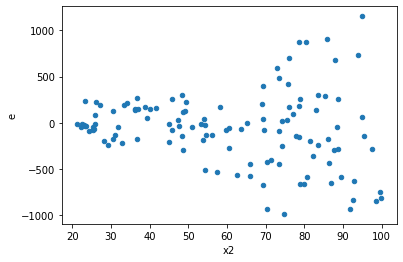

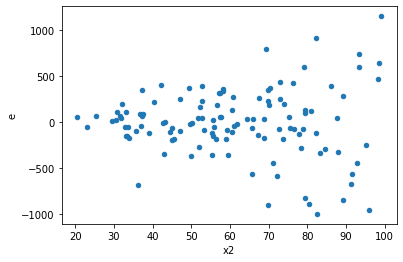

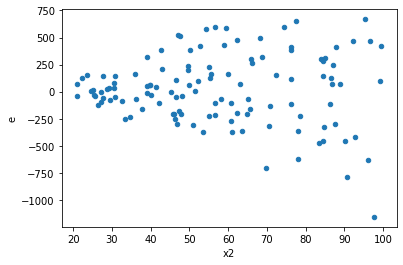

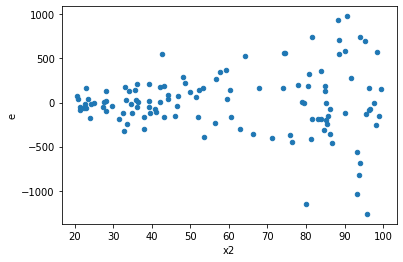

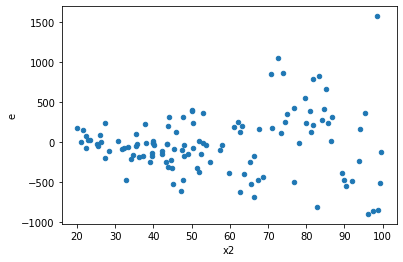

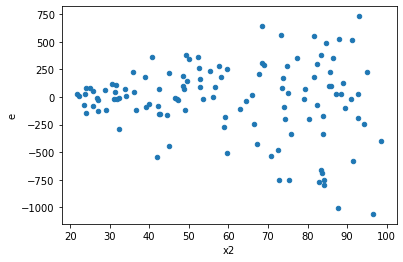

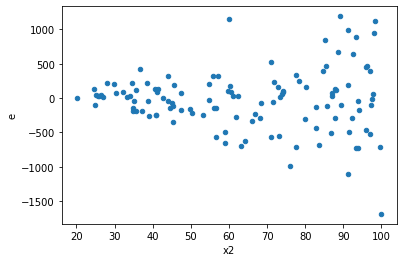

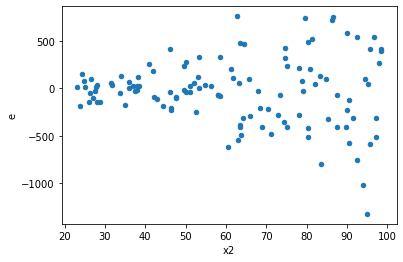

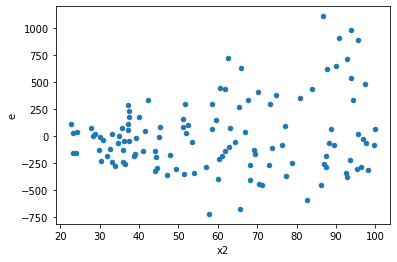

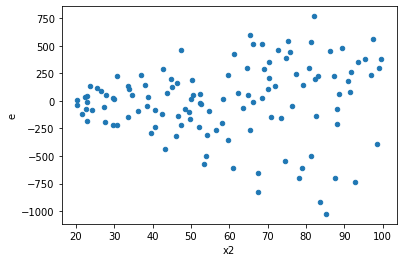

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,44.0,44.0,6461414.803444033,6716118.722089291,146850.33644190984,152639.0618656657,1.0394192179875987,0.898546781209812,0.550726609395094,0.449273390604906,Reject005=1 : Homoscedasticity
3.0,44.0,44.0,3257210.626632806,7726159.593554847,74027.51424165467,175594.5362171556,2.3720171886894184,0.005012768433748427,0.9974936157831258,0.0025063842168742134,Reject005=0 : Heteroscedasticity
4.0,44.0,44.0,3205824.2957865987,8641102.676562842,72859.64308605906,196388.69719461005,2.69543863895467,0.0013419356629642554,0.9993290321685179,0.0006709678314821277,Reject005=0 : Heteroscedasticity
7.0,44.0,44.0,5249190.158834821,6500082.897647105,119299.77633715501,147729.15676470695,1.2383020429745586,0.48129720875469495,0.7593513956226525,0.24064860437734747,Reject005=1 : Homoscedasticity
8.0,44.0,44.0,1403513.121221464,8687023.75404697,31898.025482306,197432.35804652201,6.189485244346512,1.5067314063088588e-08,0.999999992466343,7.533657031544294e-09,Reject005=0 : Heteroscedasticity
9.0,44.0,44.0,1474704.8910012008,8621603.090344045,33516.02025002729,195945.5247805465,5.84632433441697,3.762250777583631e-08,0.9999999811887461,1.8811253887918156e-08,Reject005=0 : Heteroscedasticity
11.0,44.0,44.0,8608251.2005688,9526658.447990404,195642.0727402,216514.96472705464,1.106689178327059,0.7381986106425185,0.6309006946787408,0.36909930532125923,Reject005=1 : Homoscedasticity
13.0,44.0,44.0,2238265.271625866,6055016.997332592,50869.66526422423,137614.0226666498,2.7052276037568386,0.0012902436395820782,0.999354878180209,0.0006451218197910391,Reject005=0 : Heteroscedasticity
15.0,44.0,44.0,6195710.66733743,6606099.787116094,140811.60607585066,150138.63152536575,1.0662376185418332,0.8325028771736758,0.5837485614131621,0.4162514385868379,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,44.0,44.0,6461414.803444033,6716118.722089291,146850.33644190984,152639.0618656657,1.0394192179875987,0.898546781209812,Reject005=1 : Homoscedasticity
1.0,44.0,44.0,6411934.049188013,4925469.403968968,145725.77384518212,111942.48645384019,0.7681721873905915,0.38510573744402204,Reject005=1 : Homoscedasticity
2.0,44.0,44.0,5498810.013558464,3609733.729205559,124972.95485360146,82039.40293648998,0.656457255352523,0.1666624310573101,Reject005=1 : Homoscedasticity
3.0,44.0,44.0,3257210.626632806,7726159.593554847,74027.51424165467,175594.5362171556,2.3720171886894184,0.005012768433748427,Reject005=0 : Heteroscedasticity
4.0,44.0,44.0,3205824.2957865987,8641102.676562842,72859.64308605906,196388.69719461005,2.69543863895467,0.0013419356629642554,Reject005=0 : Heteroscedasticity
5.0,44.0,44.0,6849114.746778619,2831807.0808221633,155661.69879042314,64359.25183686735,0.41345592613323684,0.004136513301986515,Reject005=0 : Heteroscedasticity
6.0,44.0,44.0,10992739.500667255,5860297.037155782,249834.98865152852,133188.56902626777,0.5331061503640712,0.03960753873748074,Reject005=0 : Heteroscedasticity
7.0,44.0,44.0,5249190.158834821,6500082.897647105,119299.77633715501,147729.15676470695,1.2383020429745586,0.48129720875469495,Reject005=1 : Homoscedasticity
8.0,44.0,44.0,1403513.121221464,8687023.75404697,31898.025482306,197432.35804652201,6.189485244346512,1.5067314063088588e-08,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    592
Reject005=1 : Homoscedasticity      408
Name: Result_test, dtype: int64